<a href="https://colab.research.google.com/github/KenDaupsey/Random-Forest-Linear-Regression-and-Prediction-Using-Python/blob/main/Random_Forest_Linear_Regression_and_Prediction_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *** Random Forest Linear Regression and Prediction Using Python ***

Mean Squared Error: 49.73221044772181
Feature Importances: [0.44347492 0.3986329  0.15789218]
Decision Tree:
|--- read <= 51.00
|   |--- read <= 40.50
|   |   |--- read <= 38.00
|   |   |   |--- socst <= 53.50
|   |   |   |   |--- write <= 45.00
|   |   |   |   |   |--- socst <= 38.50
|   |   |   |   |   |   |--- value: [46.00]
|   |   |   |   |   |--- socst >  38.50
|   |   |   |   |   |   |--- value: [45.00]
|   |   |   |   |--- write >  45.00
|   |   |   |   |   |--- value: [43.00]
|   |   |   |--- socst >  53.50
|   |   |   |   |--- value: [39.00]
|   |   |--- read >  38.00
|   |   |   |--- socst <= 38.50
|   |   |   |   |--- value: [39.00]
|   |   |   |--- socst >  38.50
|   |   |   |   |--- write <= 37.00
|   |   |   |   |   |--- value: [38.00]
|   |   |   |   |--- write >  37.00
|   |   |   |   |   |--- value: [33.00]
|   |--- read >  40.50
|   |   |--- write <= 61.50
|   |   |   |--- write <= 56.00
|   |   |   |   |--- socst <= 43.50
|   |   |   |   |   |--- read <= 43.50
|   |

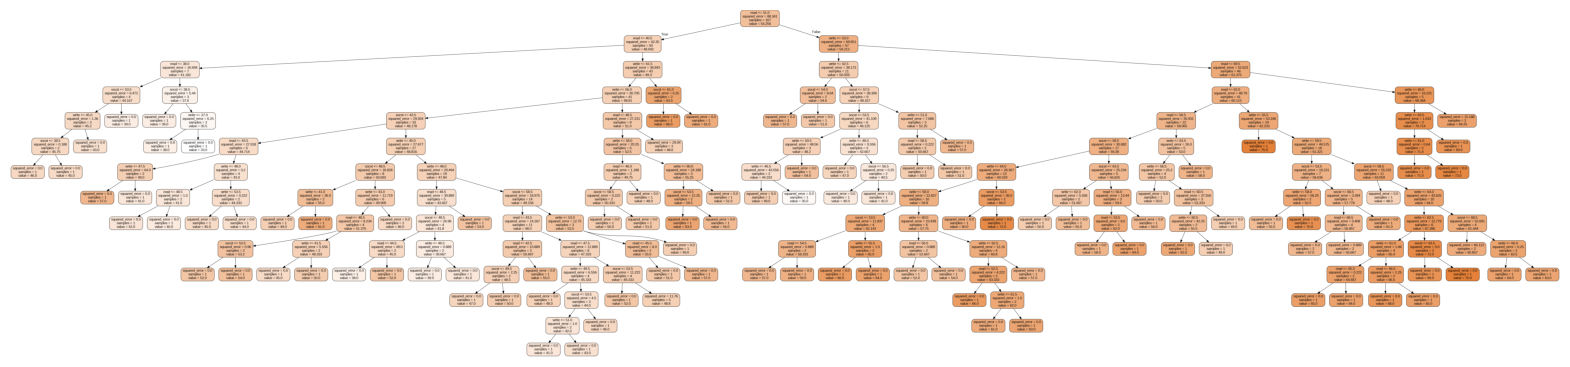

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_text
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt

#Load dataset
# import pandas as pd
url= "https://raw.githubusercontent.com/KenDaupsey/Decision-Tree-Linear-Regression-and-Prediction-/main/hsb2%7Edata.csv"
df= pd.read_csv(url)
df.head()

# Split the data into independent variables (X) and the dependent variable (y)
X = df[['write', 'read', 'socst']]
y = df['math']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Display feature importances
feature_importances = rf_model.feature_importances_
print("Feature Importances:", feature_importances)

# Display the first decision tree in the random forest
first_tree = rf_model.estimators_[0]

# Display textual representation of the tree
tree_text = export_text(first_tree, feature_names=['write', 'read', 'socst'])
print("Decision Tree:")
print(tree_text)

# Visualize the first decision tree
tree_viz = export_graphviz(first_tree, out_file=None, feature_names=['write', 'read', 'socst'], filled=True, rounded=True)
graph = graphviz.Source(tree_viz)
graph.render("first_tree", format='png', cleanup=True)

# Display the plot of the first decision tree
plt.figure(figsize=(20, 10))
plt.imshow(plt.imread('first_tree.png'))
plt.axis('off')
plt.show()

# ** Post Regression Prediction **

In [2]:
### Post Regression Prediction
import pandas as pd

# Create a new data point with the same features as your training data
new_data_point = pd.DataFrame({'write': [75], 'read': [80], 'socst': [58]})

# Predict using the random forest
forest_prediction = rf_model.predict(new_data_point)

# Display the result for Random Forest
print(f"Prediction using Random Forest: {forest_prediction[0]}")

Prediction using Random Forest: 66.564


*** The End ***